# 4.10 Intro to data visualization with python


## 0.1 Importing data and libraries

In [3]:
#Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
# Import data
path = r"C:\Users\quinn\PycharmProjects\Instacart Basket Analysis 06-30-2021"
df_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customer_merged.pkl'))

MemoryError: 

## 0.2 Checking the data frame 

In [3]:
# Checking the data frame
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 33 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   user_id                 int64   
 1   First Name              object  
 2   Surnam                  object  
 3   Gender                  object  
 4   STATE                   object  
 5   Age                     int64   
 6   date_joined             object  
 7   n_dependants            int64   
 8   fam_status              object  
 9   income                  int64   
 10  product_id              int64   
 11  product_name            object  
 12  aisle_id                float64 
 13  department_id           float64 
 14  prices                  float64 
 15  order_id                int64   
 16  order_number            int64   
 17  orders_day_of_week      int64   
 18  order_hour_of_day       int64   
 19  days_since_prior_order  float64 
 20  add_to_cart_order       int64   
 21  reorde

In [7]:
# so I can look at all the colums
pd.set_option('display.max_columns', None)
df_merged.head()

,user_id,First Name,Surnam,Gender,STATE,Age,date_joined,Number_of_dependents,family_status,income,product_id,product_name,aisle_id,department_id,prices,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,price_range_loc,busiest_day,busiest_period_of_day,max_order,loyalty_flag,mean_prices,spending_flag,median_order,Order_flag,exists
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,32.0,4.0,4.3,518967,1,2,9,NaN,1,0,both,Low-range product,Regularly busy,Average orders,8,New customer,7.988889,High spender,19.0,Regular customer,both
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,38928,0% Greek Strained Yogurt,120.0,16.0,12.6,423547,2,2,9,14.0,1,0,both,Mid-range product,Regularly busy,Average orders,8,New customer,7.988889,High spender,19.0,Regular customer,both
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,38928,0% Greek Strained Yogurt,120.0,16.0,12.6,2524893,3,3,11,30.0,1,1,both,Mid-range product,Least busy,Fewest orders,8,New customer,7.988889,High spender,19.0,Regular customer,both
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,32.0,4.0,4.3,2524893,3,3,11,30.0,2,1,both,Low-range product,Least busy,Fewest orders,8,New customer,7.988889,High spender,19.0,Regular customer,both
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,47402,Fuji Apples,24.0,4.0,7.1,2524893,3,3,11,30.0,3,0,both,Mid-range product,Least busy,Fewest orders,8,New customer,7.988889,High spender,19.0,Regular customer,both


In [8]:
#Droppimg the first and surmname of the customers for PII reasons
# and merge and exists becuse we wont need them
df_merged_1=df_merged.drop(['_merge', 'exists', 'First Name', 'Surnam'], axis = 1)

In [9]:
# checking to make sure it worked
df_merged_1.head()

,user_id,Gender,STATE,Age,date_joined,Number_of_dependents,family_status,income,product_id,product_name,aisle_id,department_id,prices,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,price_range_loc,busiest_day,busiest_period_of_day,max_order,loyalty_flag,mean_prices,spending_flag,median_order,Order_flag
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,32.0,4.0,4.3,518967,1,2,9,NaN,1,0,Low-range product,Regularly busy,Average orders,8,New customer,7.988889,High spender,19.0,Regular customer
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,38928,0% Greek Strained Yogurt,120.0,16.0,12.6,423547,2,2,9,14.0,1,0,Mid-range product,Regularly busy,Average orders,8,New customer,7.988889,High spender,19.0,Regular customer
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,38928,0% Greek Strained Yogurt,120.0,16.0,12.6,2524893,3,3,11,30.0,1,1,Mid-range product,Least busy,Fewest orders,8,New customer,7.988889,High spender,19.0,Regular customer
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,32.0,4.0,4.3,2524893,3,3,11,30.0,2,1,Low-range product,Least busy,Fewest orders,8,New customer,7.988889,High spender,19.0,Regular customer
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,47402,Fuji Apples,24.0,4.0,7.1,2524893,3,3,11,30.0,3,0,Mid-range product,Least busy,Fewest orders,8,New customer,7.988889,High spender,19.0,Regular customer


## 0.2a Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

#### Looking at the project brief we will not need the customers first or last name so I took it out of the dataframe we will be analysing

## 0.3 The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.


### Creating a new colum for the country regions 

In [10]:
#Looking at the state counts
df_merged_1['STATE'].value_counts(dropna=False)

Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mississi

In [11]:
#Create 'Region' column based on 'STATE' column using For-loop

result = []

for value in df_merged_1 ['STATE']:
    if (value== 'Maine' or value== 'New Hampshire' or value== 'Vermont' or value== 'Massachusetts' or value== 'Rhode Island' or value== 'Connecticut' or value== 'New York' or value== 'Pennsylvania' or value== 'New Jersey'):
        result.append('Northeast')
    elif(value== 'Wisconsin' or value== 'Michigan' or value== 'Illinois' or value== 'Indiana' or value== 'Ohio' or value== 'North Dakota' or value== 'South Dakota' or value== 'Nebraska' or value== 'Kansas' or value== 'Minnesota' or value== 'Iowa' or value== 'Missouri'):
        result.append('Midwest')
    elif(value== 'Delaware' or value== 'Maryland' or value== 'District of Columbia' or value== 'Virginia' or value== 'West Virginia' or value== 'North Carolina' or value== 'South Carolina' or value== 'Georgia' or value== 'Florida' or value== 'Kentucky' or value== 'Tennessee' or value== 'Mississippi' or value== 'Alabama' or value== 'Oklahoma' or value== 'Texas' or value== 'Arkansas' or value== 'Louisiana'):
        result.append('South')
    elif(value== 'Idaho' or value== 'Montana' or value== 'Wyoming' or value== 'Nevada' or value== 'Utah' or value== 'Colorado' or value== 'Arizona' or value== 'New Mexico' or value== 'Alaska' or value== 'Washington' or value== 'Oregon' or value== 'California' or value== 'Hawaii'):
        result.append('West')
    else:
        result.append('Not Enogh Data')

In [12]:
result

['Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 

In [13]:
# creating a column
df_merged_1['Region'] = result

In [14]:
# Looking at the country flags frequency
df_merged_1['Region'].value_counts(dropna=False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: Region, dtype: int64

In [15]:
#Checking the dataframe
df_merged_1.head()

,user_id,Gender,STATE,Age,date_joined,Number_of_dependents,family_status,income,product_id,product_name,aisle_id,department_id,prices,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,price_range_loc,busiest_day,busiest_period_of_day,max_order,loyalty_flag,mean_prices,spending_flag,median_order,Order_flag,Region
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,32.0,4.0,4.3,518967,1,2,9,NaN,1,0,Low-range product,Regularly busy,Average orders,8,New customer,7.988889,High spender,19.0,Regular customer,Midwest
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,38928,0% Greek Strained Yogurt,120.0,16.0,12.6,423547,2,2,9,14.0,1,0,Mid-range product,Regularly busy,Average orders,8,New customer,7.988889,High spender,19.0,Regular customer,Midwest
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,38928,0% Greek Strained Yogurt,120.0,16.0,12.6,2524893,3,3,11,30.0,1,1,Mid-range product,Least busy,Fewest orders,8,New customer,7.988889,High spender,19.0,Regular customer,Midwest
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,32.0,4.0,4.3,2524893,3,3,11,30.0,2,1,Low-range product,Least busy,Fewest orders,8,New customer,7.988889,High spender,19.0,Regular customer,Midwest
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,47402,Fuji Apples,24.0,4.0,7.1,2524893,3,3,11,30.0,3,0,Mid-range product,Least busy,Fewest orders,8,New customer,7.988889,High spender,19.0,Regular customer,Midwest


### Determine whether there's a difference in spending habits between the different u.s. regions.

In [16]:
# makeing a crosstab for the diffence in spending habbits and region
crosstab = pd.crosstab(df_merged_1['Region'], df_merged_1['spending_flag'], dropna = False)

In [17]:
# looking at the diffence bewtween the regions
crosstab

spending_flag,High spender,Low spender
Region,,
Midwest,7441371,155954
Northeast,5614536,108200
South,10582249,209636
West,8132611,160302


Looking at the data you can see in both categories High spender and low spender the Southren region is the highest it goes

1. South

2. West

3. Midwest

4. Northeast

## 0.4 The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.


In [18]:
# creating a exclusion flag for customers with low activite
df_merged_1.loc[df_merged_1['order_number'] <5,'Activity_Flag'] = 'Low_activity'

In [19]:
df_merged_1.loc[df_merged_1['order_number'] >= 5,'Activity_Flag'] = 'High_activity'

In [20]:
# Looking at the frequency
df_merged_1['Activity_Flag'].value_counts(dropna=False)

High_activity    24414877
Low_activity      7989982
Name: Activity_Flag, dtype: int64

In [21]:
# creating the sample
df_low_activity = df_merged_1[df_merged_1.Activity_Flag == 'Low_activity']

In [22]:
# Checking the shape to make sure i got the whole thing
df_low_activity.shape

(7989982, 31)

In [23]:
# Exporting the data
df_low_activity.to_pickle(os.path.join(path,'02 Data','Prepared Data', 'df_low_activity.pkl'))

In [24]:
# looking at the total amount before I drop the low activity
df_merged_1.shape

(32404859, 31)

In [29]:
df_merged_1 = df_merged_1[df_merged_1.Activity_Flag == 'High_activity']

In [30]:
# Looking at the shape afterwards
df_merged_1.shape

(24414877, 31)

## 0.5 The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)


In [32]:
df_merged_1['income'].describe().apply("{0:.5f}".format)

count    24414877.00000
mean        99895.04984
std         43333.56509
min         25903.00000
25%         67524.00000
50%         96836.00000
75%        128160.00000
max        593901.00000
Name: income, dtype: object

In [33]:
# Creating a income level column
df_merged_1.loc[df_merged_1['income'] <40000,'Income_Level'] = 'Low_income'

In [34]:
df_merged_1.loc[(df_merged_1['income'] >= 40000) & (df_merged_1['income'] <= 100000), 'Income_Level'] = 'Middle_income'

In [35]:
df_merged_1.loc[df_merged_1['income'] > 100000, 'Income_Level'] = 'Higher_income'

In [36]:
df_merged_1['Income_Level'].value_counts(dropna=False)

Middle_income    11949316
Higher_income    11225709
Low_income        1239852
Name: Income_Level, dtype: int64

In [37]:
df_merged_1.head()

,user_id,Gender,STATE,Age,date_joined,Number_of_dependents,family_status,income,product_id,product_name,aisle_id,department_id,prices,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,price_range_loc,busiest_day,busiest_period_of_day,max_order,loyalty_flag,mean_prices,spending_flag,median_order,Order_flag,Region,Activity_Flag,Income_Level
7,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,32.0,4.0,4.3,2543867,5,1,9,30.0,1,1,Low-range product,Busiest day,Average orders,8,New customer,7.988889,High spender,19.0,Regular customer,Midwest,High_activity,Higher_income
8,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,77.0,7.0,9.0,2543867,5,1,9,30.0,2,0,Mid-range product,Busiest day,Average orders,8,New customer,7.988889,High spender,19.0,Regular customer,Midwest,High_activity,Higher_income
9,26711,Female,Missouri,48,1/1/2017,3,married,165665,8617,Assorted Nuggets,45.0,19.0,4.0,2543867,5,1,9,30.0,3,0,Low-range product,Busiest day,Average orders,8,New customer,7.988889,High spender,19.0,Regular customer,Midwest,High_activity,Higher_income
10,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,32.0,4.0,4.3,2505178,6,1,8,21.0,1,1,Low-range product,Busiest day,Average orders,8,New customer,7.988889,High spender,19.0,Regular customer,Midwest,High_activity,Higher_income
11,26711,Female,Missouri,48,1/1/2017,3,married,165665,38928,0% Greek Strained Yogurt,120.0,16.0,12.6,2505178,6,1,8,21.0,2,1,Mid-range product,Busiest day,Average orders,8,New customer,7.988889,High spender,19.0,Regular customer,Midwest,High_activity,Higher_income


In [38]:
# Creating a parent column
df_merged_1.loc[((df_merged_1['Age'] >= 18) & (df_merged_1['Age'] <= 35) & (df_merged_1['Number_of_dependents'] >= 1)), 'Parent_Status'] = 'Young Parent'

In [39]:
df_merged_1.loc[(df_merged_1['Age'] >= 35) & (df_merged_1['Age'] <= 50) & (df_merged_1['Number_of_dependents'] >= 1), 'Parent_Status'] = 'Middle Age Parent'

In [40]:
df_merged_1.loc[(df_merged_1['Age'] >= 50) & (df_merged_1['Number_of_dependents'] >= 1), 'Parent_Status'] = 'Older Parent' 

In [41]:
df_merged_1.loc[(df_merged_1 ['Number_of_dependents'] == 0), 'Parent_Status'] = 'No Dependents'

In [42]:
df_merged_1['Parent_Status'].value_counts(dropna= False)

Older Parent         9088055
No Dependents        6105002
Young Parent         4878356
Middle Age Parent    4343464
Name: Parent_Status, dtype: int64

In [43]:
df_merged_1.shape

(24414877, 33)

In [44]:
df_merged_1.head()

,user_id,Gender,STATE,Age,date_joined,Number_of_dependents,family_status,income,product_id,product_name,aisle_id,department_id,prices,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,price_range_loc,busiest_day,busiest_period_of_day,max_order,loyalty_flag,mean_prices,spending_flag,median_order,Order_flag,Region,Activity_Flag,Income_Level,Parent_Status
7,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,32.0,4.0,4.3,2543867,5,1,9,30.0,1,1,Low-range product,Busiest day,Average orders,8,New customer,7.988889,High spender,19.0,Regular customer,Midwest,High_activity,Higher_income,Middle Age Parent
8,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,77.0,7.0,9.0,2543867,5,1,9,30.0,2,0,Mid-range product,Busiest day,Average orders,8,New customer,7.988889,High spender,19.0,Regular customer,Midwest,High_activity,Higher_income,Middle Age Parent
9,26711,Female,Missouri,48,1/1/2017,3,married,165665,8617,Assorted Nuggets,45.0,19.0,4.0,2543867,5,1,9,30.0,3,0,Low-range product,Busiest day,Average orders,8,New customer,7.988889,High spender,19.0,Regular customer,Midwest,High_activity,Higher_income,Middle Age Parent
10,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,32.0,4.0,4.3,2505178,6,1,8,21.0,1,1,Low-range product,Busiest day,Average orders,8,New customer,7.988889,High spender,19.0,Regular customer,Midwest,High_activity,Higher_income,Middle Age Parent
11,26711,Female,Missouri,48,1/1/2017,3,married,165665,38928,0% Greek Strained Yogurt,120.0,16.0,12.6,2505178,6,1,8,21.0,2,1,Mid-range product,Busiest day,Average orders,8,New customer,7.988889,High spender,19.0,Regular customer,Midwest,High_activity,Higher_income,Middle Age Parent


In [45]:
# creating a flag to see who order frozen food
df_merged_1.loc[(df_merged_1['department_id'] == 1), 'frozen_food_flag'] = 1

In [46]:
df_merged_1.loc[(df_merged_1['department_id'] != 1), 'frozen_food_flag'] = 0

In [47]:
df_merged_1['frozen_food_flag'].value_counts(dropna= False)

0.0    22787263
1.0     1627614
Name: frozen_food_flag, dtype: int64

In [48]:
# creating a flag to see who orders produce
df_merged_1.loc[(df_merged_1['department_id'] == 4), 'produce_flag'] = 1

In [49]:
df_merged_1.loc[(df_merged_1['department_id'] != 4), 'produce_flag'] = 0

In [50]:
df_merged_1['produce_flag'].value_counts(dropna= False)

0.0    17187786
1.0     7227091
Name: produce_flag, dtype: int64

In [51]:
# creating a flag to see who orders meat and seafood
df_merged_1.loc[(df_merged_1['department_id'] == 12), 'Meat_flag'] = 1

In [52]:
df_merged_1.loc[(df_merged_1['department_id'] != 12), 'Meat_flag'] = 0

In [53]:
df_merged_1['Meat_flag'].value_counts(dropna= False)

0.0    23890987
1.0      523890
Name: Meat_flag, dtype: int64

In [54]:
df_merged_1.head()

,user_id,Gender,STATE,Age,date_joined,Number_of_dependents,family_status,income,product_id,product_name,aisle_id,department_id,prices,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,price_range_loc,busiest_day,busiest_period_of_day,max_order,loyalty_flag,mean_prices,spending_flag,median_order,Order_flag,Region,Activity_Flag,Income_Level,Parent_Status,frozen_food_flag,produce_flag,Meat_flag
7,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,32.0,4.0,4.3,2543867,5,1,9,30.0,1,1,Low-range product,Busiest day,Average orders,8,New customer,7.988889,High spender,19.0,Regular customer,Midwest,High_activity,Higher_income,Middle Age Parent,0.0,1.0,0.0
8,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,77.0,7.0,9.0,2543867,5,1,9,30.0,2,0,Mid-range product,Busiest day,Average orders,8,New customer,7.988889,High spender,19.0,Regular customer,Midwest,High_activity,Higher_income,Middle Age Parent,0.0,0.0,0.0
9,26711,Female,Missouri,48,1/1/2017,3,married,165665,8617,Assorted Nuggets,45.0,19.0,4.0,2543867,5,1,9,30.0,3,0,Low-range product,Busiest day,Average orders,8,New customer,7.988889,High spender,19.0,Regular customer,Midwest,High_activity,Higher_income,Middle Age Parent,0.0,0.0,0.0
10,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,32.0,4.0,4.3,2505178,6,1,8,21.0,1,1,Low-range product,Busiest day,Average orders,8,New customer,7.988889,High spender,19.0,Regular customer,Midwest,High_activity,Higher_income,Middle Age Parent,0.0,1.0,0.0
11,26711,Female,Missouri,48,1/1/2017,3,married,165665,38928,0% Greek Strained Yogurt,120.0,16.0,12.6,2505178,6,1,8,21.0,2,1,Mid-range product,Busiest day,Average orders,8,New customer,7.988889,High spender,19.0,Regular customer,Midwest,High_activity,Higher_income,Middle Age Parent,0.0,0.0,0.0


In [1]:
df_merged_1.shape

NameError: name 'df_merged_1' is not defined

#### With these 3 new variables we can see look at if familys with dependents order more frozen food or food they have to prepare

In [55]:
# Creating a new data fram
df_profile = df_merged_1[['user_id', 'Region', 'department_id', 'family_status', 'Parent_Status', 'Income_Level', 'frozen_food_flag', 'produce_flag', 'Meat_flag']]

In [56]:
df_profile.head()

,user_id,Region,department_id,family_status,Parent_Status,Income_Level,frozen_food_flag,produce_flag,Meat_flag
7,26711,Midwest,4.0,married,Middle Age Parent,Higher_income,0.0,1.0,0.0
8,26711,Midwest,7.0,married,Middle Age Parent,Higher_income,0.0,0.0,0.0
9,26711,Midwest,19.0,married,Middle Age Parent,Higher_income,0.0,0.0,0.0
10,26711,Midwest,4.0,married,Middle Age Parent,Higher_income,0.0,1.0,0.0
11,26711,Midwest,16.0,married,Middle Age Parent,Higher_income,0.0,0.0,0.0


In [57]:
df_profile.shape

(24414877, 9)

In [58]:
#looking at the amount of people in the regons
df_region = df_profile.groupby('Region').agg({'user_id':['nunique']})

In [59]:
df_region

,user_id
,nunique
Region,
Midwest,38376
Northeast,28581
South,54193
West,41481


In [60]:
df_region_family = df_profile.groupby(['Region','Parent_Status']).agg({'user_id':['nunique']})

In [61]:
df_region_family

user_id
                            nunique
Region    Parent_Status            
Midwest   Middle Age Parent    6795
          No Dependents        9566
          Older Parent        14443
          Young Parent         7572
Northeast Middle Age Parent    5099
          No Dependents        7255
          Older Parent        10676
          Young Parent         5551
South     Middle Age Parent    9475
          No Dependents       13537
          Older Parent        20415
          Young Parent        10766
West      Middle Age Parent    7204
          No Dependents       10369
          Older Parent        15578
          Young Parent         8330

In [62]:
# Comparing family status with parent status
df_parent_family = df_profile.groupby(['family_status','Parent_Status']).agg({'user_id':['nunique']})

In [63]:
df_parent_family

user_id
                                                   nunique
family_status                    Parent_Status            
divorced/widowed                 No Dependents       13831
living with parents and siblings Young Parent         7608
married                          Middle Age Parent   28573
                                 Older Parent        61112
                                 Young Parent        24611
single                           No Dependents       26896

In [64]:
# Comparing family status with frozen department
df_family_frozen = df_profile.groupby(['family_status','frozen_food_flag']).agg({'user_id':['nunique']})

In [65]:
df_family_frozen

user_id
                                                  nunique
family_status                    frozen_food_flag        
divorced/widowed                 0.0                13823
                                 1.0                10280
living with parents and siblings 0.0                 7602
                                 1.0                 5698
married                          0.0               114213
                                 1.0                84734
single                           0.0                26879
                                 1.0                19889

In [66]:
# Comparing family status with produce department
df_family_produce = df_profile.groupby(['family_status','produce_flag']).agg({'user_id':['nunique']})

In [67]:
df_family_produce

user_id
                                              nunique
family_status                    produce_flag        
divorced/widowed                 0.0            13766
                                 1.0            12562
living with parents and siblings 0.0             7585
                                 1.0             6972
married                          0.0           113787
                                 1.0           104305
single                           0.0            26781
                                 1.0            24483

In [68]:
# Comparing family status with meat department
df_family_meat = df_profile.groupby(['family_status','Meat_flag']).agg({'user_id':['nunique']})

In [69]:
df_family_meat

user_id
                                           nunique
family_status                    Meat_flag        
divorced/widowed                 0.0         13829
                                 1.0          7052
living with parents and siblings 0.0          7608
                                 1.0          3845
married                          0.0        114273
                                 1.0         58052
single                           0.0         26890
                                 1.0         13499

In [70]:
# Comparing parent status with frozen department
df_parent_frozen = df_profile.groupby(['Parent_Status','frozen_food_flag']).agg({'user_id':['nunique']})

In [71]:
df_parent_frozen

user_id
                                   nunique
Parent_Status     frozen_food_flag        
Middle Age Parent 0.0                28552
                  1.0                21185
No Dependents     0.0                40702
                  1.0                30169
Older Parent      0.0                61068
                  1.0                45333
Young Parent      0.0                32195
                  1.0                23914

In [72]:
# Comparing parent status with produce department
df_parent_produce = df_profile.groupby(['Parent_Status','produce_flag']).agg({'user_id':['nunique']})

In [73]:
df_parent_produce

user_id
                               nunique
Parent_Status     produce_flag        
Middle Age Parent 0.0            28450
                  1.0            26128
No Dependents     0.0            40547
                  1.0            37045
Older Parent      0.0            60835
                  1.0            55747
Young Parent      0.0            32087
                  1.0            29402

In [74]:
# Comparing parent status with meat department
df_parent_meat = df_profile.groupby(['Parent_Status','Meat_flag']).agg({'user_id':['nunique']})

In [75]:
df_parent_meat

user_id
                            nunique
Parent_Status     Meat_flag        
Middle Age Parent 0.0         28565
                  1.0         14616
No Dependents     0.0         40719
                  1.0         20551
Older Parent      0.0         61101
                  1.0         31047
Young Parent      0.0         32215
                  1.0         16234

## 0.6 Create an appropriate visualization to show the distribution of profiles.


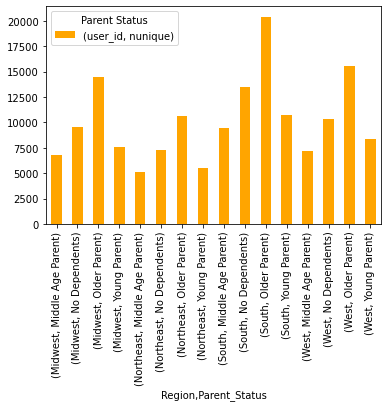

In [109]:
# crating a box plot for parent status by region
df_region_parent_plot=df_region_family.plot.bar(color=['orange'])
plt.legend(title='Parent Status')

In [104]:
#saving the image
df_region_parent_plot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'df_region_parent_plot.png'))

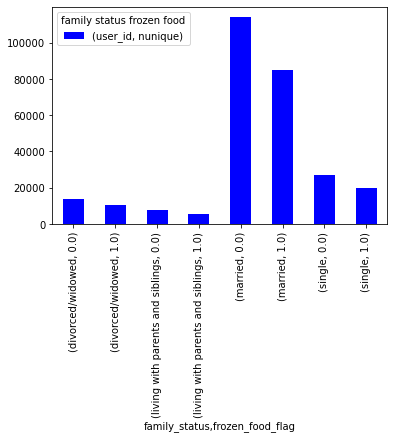

In [121]:
# creating a bar plot for family status by frozen food
df_family_frozen_plot = df_family_frozen.plot.bar(color=['blue'])
plt.legend(title='family status frozen food')

In [122]:
# Saving the image
df_family_frozen_plot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'df_family_frozen_plot.png'))

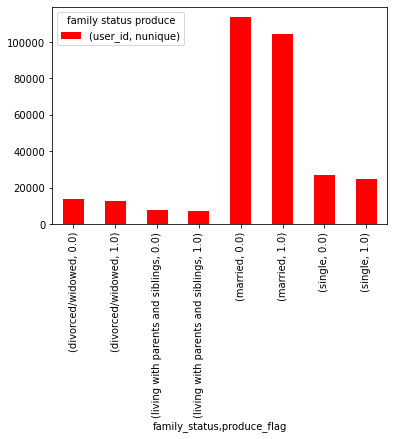

In [127]:
# creating a bar plot for family status and produce
df_family_produce_plot = df_family_produce.plot.bar(color=['red'])
plt.legend(title='family status produce')

In [128]:
# Saving the image
df_family_produce_plot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'df_family_produce_plot.png'))

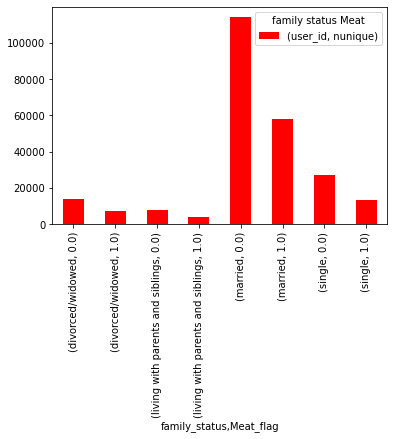

In [129]:
# creating a bar plot for family status and meat
df_family_meat_plot = df_family_meat.plot.bar(color=['red'])
plt.legend(title='family status Meat')

In [130]:
# Saving the image
df_family_meat_plot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'df_family_meat_plot.png'))

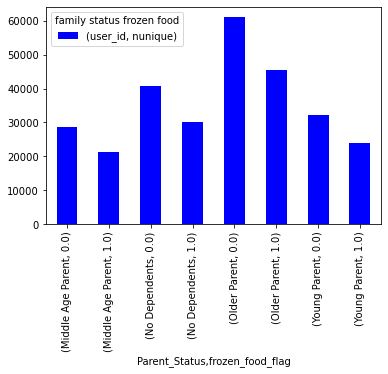

In [134]:
# creating a bar plot for parent status and frozen food
df_parent_frozen_plot = df_parent_frozen.plot.bar(color=['blue'])
plt.legend(title='parent status frozen food')

In [135]:
# Saving the image
df_parent_frozen_plot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'df_parent_frozen_plot.png'))

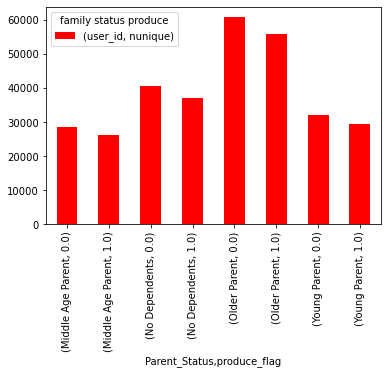

In [132]:
# creating a bar plot for parent status and produce
df_parent_produce_plot = df_parent_produce.plot.bar(color=['red'])
plt.legend(title='family status produce')

In [136]:
# Saving the image
df_parent_produce_plot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'df_parent_produce_plot.png'))

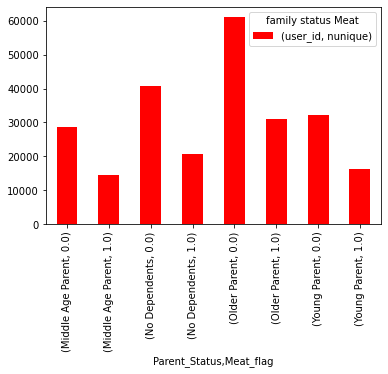

In [138]:
# creating a bar plot for parent status and meat
df_parent_meat_plot = df_parent_meat.plot.bar(color=['red'])
plt.legend(title='family status Meat')

In [139]:
# Saving the image
df_parent_meat_plot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'df_parent_meat_plot.png'))

## 0.7 Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.


In [140]:
# Creating a order hour frequency for parent status
df_merged_1.groupby('Parent_Status').agg({'order_hour_of_day':['max','min','mean','median']})

order_hour_of_day                      
                                max min       mean median
Parent_Status                                            
Middle Age Parent                23   0  13.380633     13
No Dependents                    23   0  13.365228     13
Older Parent                     23   0  13.363379     13
Young Parent                     23   0  13.341019     13

In [150]:
# creating a order day frequency for parent status
df_merged_1.groupby('Parent_Status').agg({'orders_day_of_week':['max','min','mean','median']})

orders_day_of_week                     
                                 max min      mean median
Parent_Status                                            
Middle Age Parent                  6   0  2.748545      3
No Dependents                      6   0  2.741635      3
Older Parent                       6   0  2.753982      3
Young Parent                       6   0  2.744084      3

In [151]:
# creating a days since prior order frequency for parent status
df_merged_1.groupby('Parent_Status').agg({'days_since_prior_order':['max','min','mean','median']})

days_since_prior_order                       
                                     max  min       mean median
Parent_Status                                                  
Middle Age Parent                   30.0  0.0  10.052928    7.0
No Dependents                       30.0  0.0  10.063556    7.0
Older Parent                        30.0  0.0  10.115874    7.0
Young Parent                        30.0  0.0  10.084048    7.0

In [152]:
# creating a income frequency for parent status
df_merged_1.groupby('Parent_Status').agg({'income':['max','min','mean','median']})

income                              
                      max    min           mean  median
Parent_Status                                          
Middle Age Parent  592409  25941   98627.180064   95163
No Dependents      584097  25903  100179.559824   97077
Older Parent       593901  29001  115975.532443  116211
Young Parent       396364  25911   70710.976831   69226

In [153]:
# creating a reordered frequency for parent status
df_merged_1.groupby('Parent_Status').agg({'reordered':['max','min','mean','median']})

reordered                     
                        max min      mean median
Parent_Status                                   
Middle Age Parent         1   0  0.694567      1
No Dependents             1   0  0.694025      1
Older Parent              1   0  0.692163      1
Young Parent              1   0  0.692783      1

## 0.8 Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.


In [156]:
#creating a cross tab for department and parent status
crosstab_parent_dep = pd.crosstab(df_profile['department_id'],df_profile['Parent_Status'], dropna=False )
crosstab_parent_dep

Parent_Status,Middle Age Parent,No Dependents,Older Parent,Young Parent
department_id,,,,
1.0,288988,405513,608487,324626
2.0,4530,6935,10062,5639
3.0,156548,221599,329085,176098
4.0,1286585,1812885,2688302,1439319
5.0,18558,27959,38494,22961
6.0,35463,50038,72643,39756
7.0,356514,512055,766599,401279
8.0,12213,18250,27193,14455
9.0,112533,157414,236730,127048


#### With this crosstab you can se that older parents use the app more ofthen then other parents they have the highest orders for most of the departments

In [157]:
#creating a cross tab for department and family status
crosstab_family_dep = pd.crosstab(df_profile['department_id'],df_profile['family_status'], dropna=False )
crosstab_family_dep

family_status,divorced/widowed,living with parents and siblings,married,single
department_id,,,,
1.0,141623,79512,1142589,263890
2.0,2267,1460,18771,4668
3.0,75587,42543,619188,146012
4.0,619577,343702,5070504,1193308
5.0,8936,6284,73729,19023
6.0,16965,9659,138203,33073
7.0,175452,94324,1430068,336603
8.0,6262,4190,49671,11988
9.0,54174,30606,445705,103240


### Married people use the app a lot more then other family status

In [158]:
#creating a cross tab for department and region
crosstab_Region_dep = pd.crosstab(df_profile['department_id'],df_profile['Region'], dropna=False )
crosstab_Region_dep

Region,Midwest,Northeast,South,West
department_id,,,,
1.0,381094,283259,545809,417452
2.0,6284,4932,9200,6750
3.0,205374,157635,292772,227549
4.0,1695851,1269360,2409221,1852659
5.0,25567,18534,36253,27618
6.0,46607,34491,65417,51385
7.0,472243,367868,680594,515742
8.0,16481,14080,23012,18538
9.0,148529,110708,210680,163808


#### With this crosstab you can see south has the highest orders

In [159]:
#creating a cross tab for department and Income level
crosstab_income_dep = pd.crosstab(df_profile['department_id'],df_profile['Income_Level'], dropna=False )
crosstab_income_dep

Income_Level,Higher_income,Low_income,Middle_income
department_id,,,
1.0,762481,75687,789446
2.0,12518,1535,13113
3.0,417038,37613,428679
4.0,3377215,293668,3556208
5.0,52542,6052,49378
6.0,92806,7494,97600
7.0,894607,149568,992272
8.0,35242,3349,33520
9.0,304051,21237,308437


#### The people in the middle income use the app a lot more then others

## 0.9 Produce suitable charts to illustrate your results and export them in your project folder.


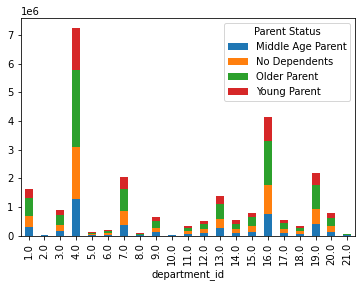

In [161]:
#creating a stacked bar chart for department and parent status
parent_dep_stacked_bar = crosstab_parent_dep.plot.bar(stacked= True)
plt.legend(title='Parent Status')

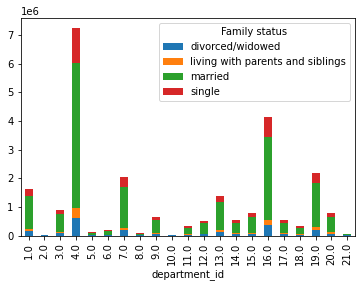

In [162]:
#creating a stacked bar chart for department and family status
family_dep_stacked_bar = crosstab_family_dep.plot.bar(stacked= True)
plt.legend(title='Family status')

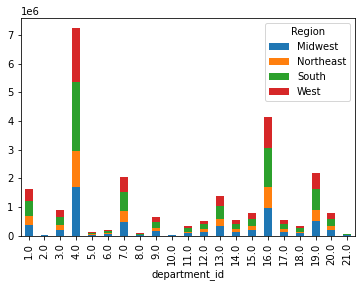

In [163]:
#creating a stacked bar chart for department and region
region_dep_stacked_bar = crosstab_Region_dep.plot.bar(stacked= True)
plt.legend(title='Region')

#creating a stacked bar chart for department and Income level
income_dep_stacked_bar = crosstab_income_dep.plot.bar(stacked= True)
plt.legend(title='Income level')

## 1.0 Expoting

In [165]:
#exporint the graphs
parent_dep_stacked_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'parent_dep_stacked_bar.png'))

In [166]:
family_dep_stacked_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'family_dep_stacked_bar.png'))

In [167]:
region_dep_stacked_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_dep_stacked_bar.png'))

In [168]:
income_dep_stacked_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_dep_stacked_bar.png'))

In [77]:
df_merged_1.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customer_merged_v2.pkl'))

In [76]:
df_profile.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customer_profile.pkl'))